# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Comment
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_json = requests.get(city_url).json()
        city_weather = json.dumps(response_json, indent = 4, sort_keys = True)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lospalos
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ghanzi
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | chardara
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | wagar
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | pacocha
Processing Record 20 of Set 1 | galliano
Processing Record 21 of Set 1 | labrador city
Processing Record 22 of Set 1 | verkhniye tatyshly
Processing Record 

In [4]:
#test = f"{url}appid={weather_api_key}&q=Paris"
#r = requests.get(test).json()
#r_json = json.dumps(r, indent = 4, sort_keys = True)

#t = r_json["coord"]
#print(r_json["coord"])

test = f"{url}appid={weather_api_key}&q=Paris"
r = requests.get(test).json()
print(r)
t = r["coord"]
print(r["coord"])

{'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.05, 'feels_like': 287.45, 'temp_min': 286.36, 'temp_max': 289.03, 'pressure': 1009, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 150}, 'clouds': {'all': 0}, 'dt': 1708036695, 'sys': {'type': 2, 'id': 2012208, 'country': 'FR', 'sunrise': 1707980411, 'sunset': 1708016976}, 'timezone': 3600, 'id': 2988507, 'name': 'Paris', 'cod': 200}
{'lon': 2.3488, 'lat': 48.8534}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.set_index("City")

# Show Record Count
print(city_data_df.count())


City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,298.48,77,70,3.20,PN,1708036803
1,lospalos,-8.5186,127.0025,297.63,89,46,3.23,TL,1708036804
2,olonkinbyen,70.9221,-8.7187,262.24,58,99,11.70,SJ,1708036804
3,udachny,66.4167,112.4000,236.73,66,98,2.43,RU,1708036804
4,port-aux-francais,-49.3500,70.2167,281.92,94,98,14.50,TF,1708036805


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\cities.csv", index_col="City_ID")
city_data_df2 = city_data_df.rename(columns = {"Lat" : "Latitude", "Lng" : "Longitude", "Max Temp" : "Temperature"})
# Display sample data
city_data_df2.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.48,77,70,3.20,PN,1708036803
1,lospalos,-8.5186,127.0025,297.63,89,46,3.23,TL,1708036804
2,olonkinbyen,70.9221,-8.7187,262.24,58,99,11.70,SJ,1708036804
3,udachny,66.4167,112.4000,236.73,66,98,2.43,RU,1708036804
4,port-aux-francais,-49.3500,70.2167,281.92,94,98,14.50,TF,1708036805


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

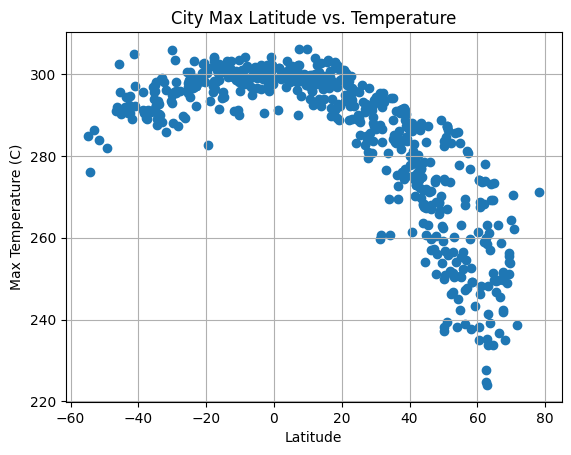

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df2["Latitude"], city_data_df2["Temperature"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

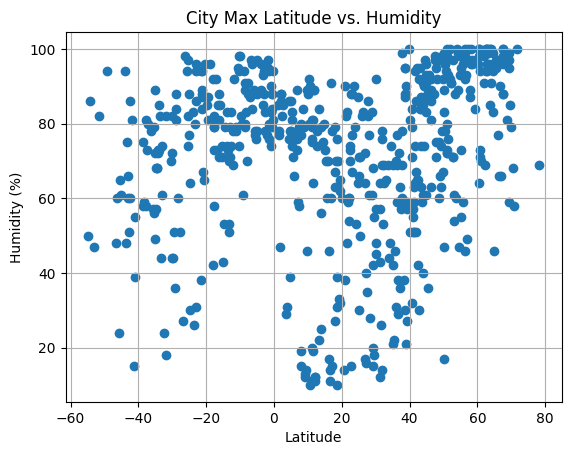

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df2["Latitude"], city_data_df2["Humidity"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

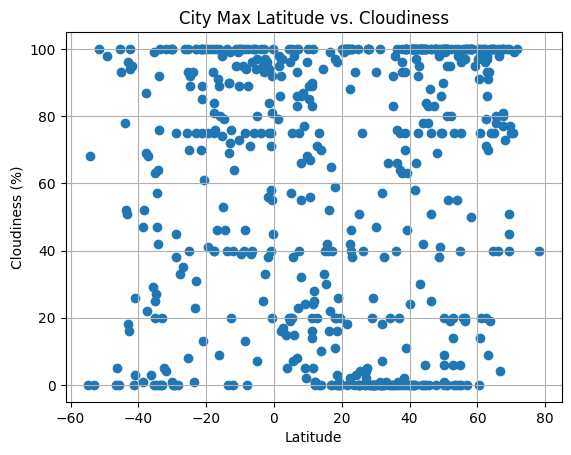

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df2["Latitude"], city_data_df2["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

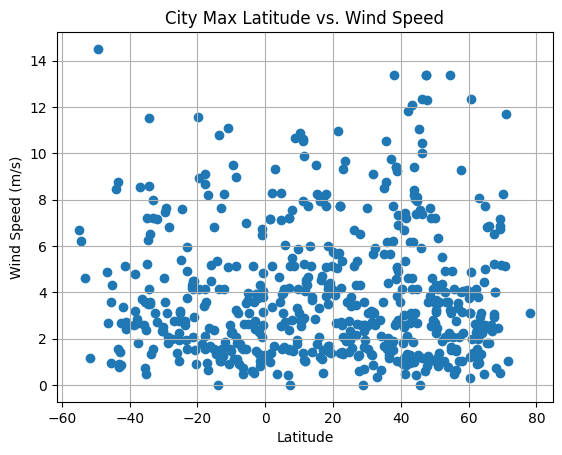

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df2["Latitude"], city_data_df2["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\Owner\\OneDrive\\Desktop\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def lin_plotter(df, x_column, y_column):

    plt.scatter(df[x_column], df[y_column])

    # Incorporate the other graph properties
    plt.ylabel(y_column)
    plt.xlabel(x_column)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_column], df[y_column])
    plt.legend(["y = " + str(round(slope,2)) + "x + " + str((round(intercept,2)))])
    
    # fitting a linear regression line
    m, b = np.polyfit(df[x_column], df[y_column], 1)

    # adding the regression line to the scatter plot
    plt.plot(df[x_column], m*df[x_column] + b, color = "red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df2.loc[city_data_df2["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,262.24,58,99,11.70,SJ,1708036804
3,udachny,66.4167,112.4000,236.73,66,98,2.43,RU,1708036804
8,kingston,17.9970,-76.7936,302.68,67,20,8.23,JM,1708036806
9,vadso,70.0744,29.7487,264.24,79,75,8.23,NO,1708036806
10,chardara,41.2547,67.9692,282.80,63,100,7.41,KZ,1708036806


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df2.loc[city_data_df2["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,298.48,77,70,3.20,PN,1708036803
1,lospalos,-8.5186,127.0025,297.63,89,46,3.23,TL,1708036804
4,port-aux-francais,-49.3500,70.2167,281.92,94,98,14.50,TF,1708036805
5,puerto ayora,-0.7393,-90.3518,304.13,90,71,3.13,EC,1708036805
6,ghanzi,-21.5667,21.7833,298.19,38,70,4.17,BW,1708036805


###  Temperature vs. Latitude Linear Regression Plot

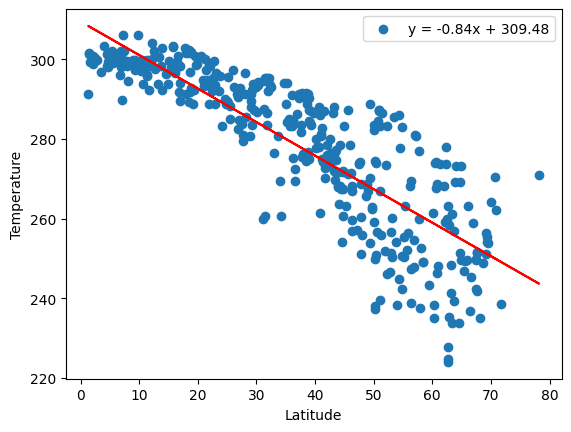

In [16]:
# Linear regression on Northern Hemisphere
lin_plotter(northern_hemi_df,"Latitude", "Temperature")

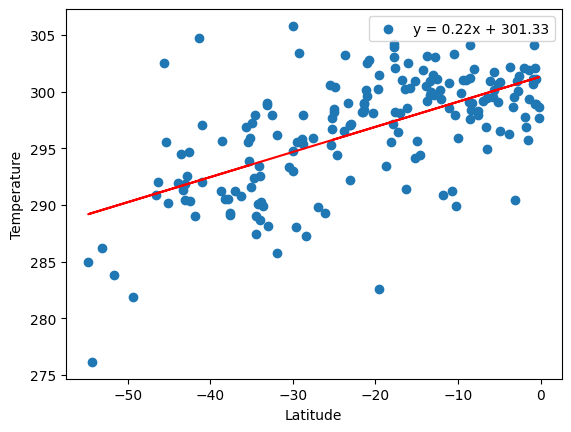

In [17]:
# Linear regression on Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

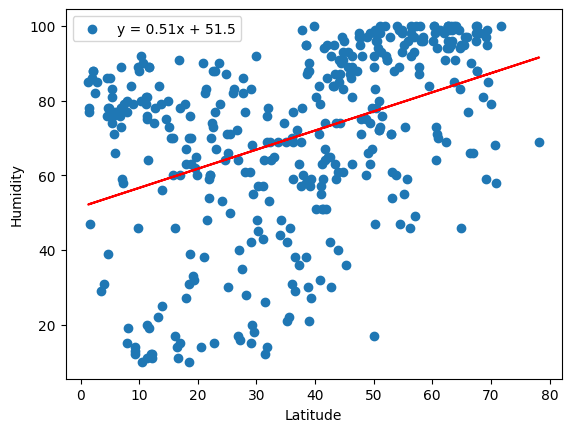

In [18]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Humidity")

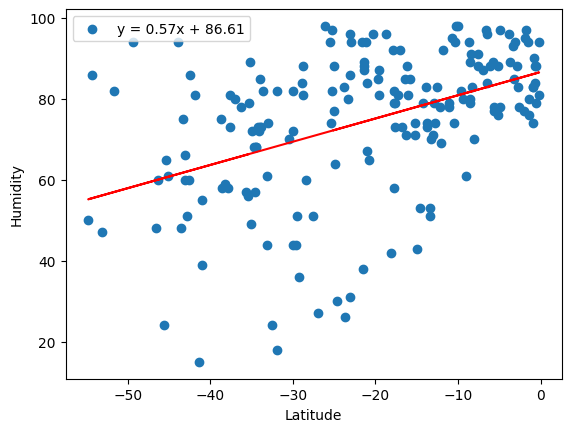

In [19]:
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

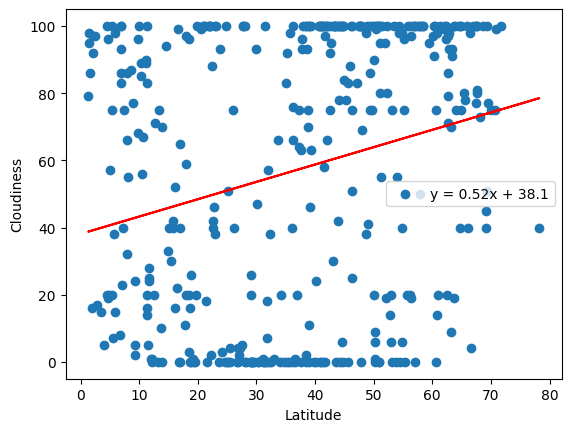

In [20]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Cloudiness")

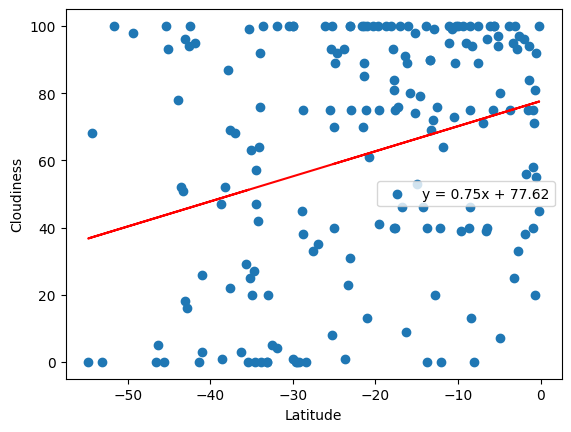

In [21]:
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

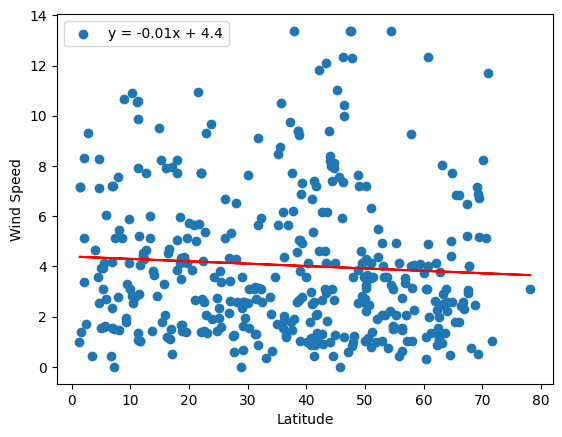

In [22]:
# Northern Hemisphere
lin_plotter(northern_hemi_df, "Latitude", "Wind Speed")

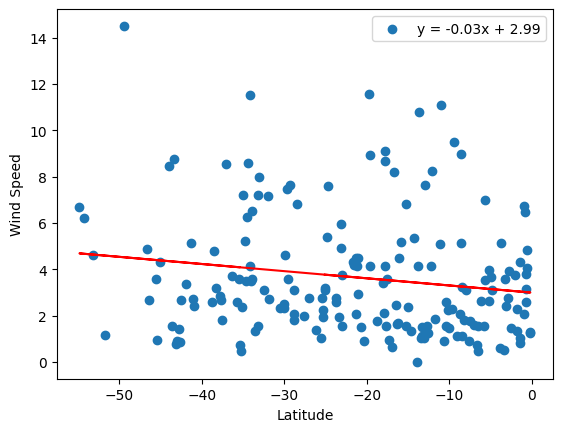

In [23]:
# Remember to print "The r-value is ..."
# Southern Hemisphere
lin_plotter(southern_hemi_df, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE